**BUILDING CNN: CONVULATION NEURAL NETWROKS**
<BR>
**PROJECT FASHION CLASSIFICATION END TO END**


In [1]:
# Convolutional Neural Network
# for image classificationkm 

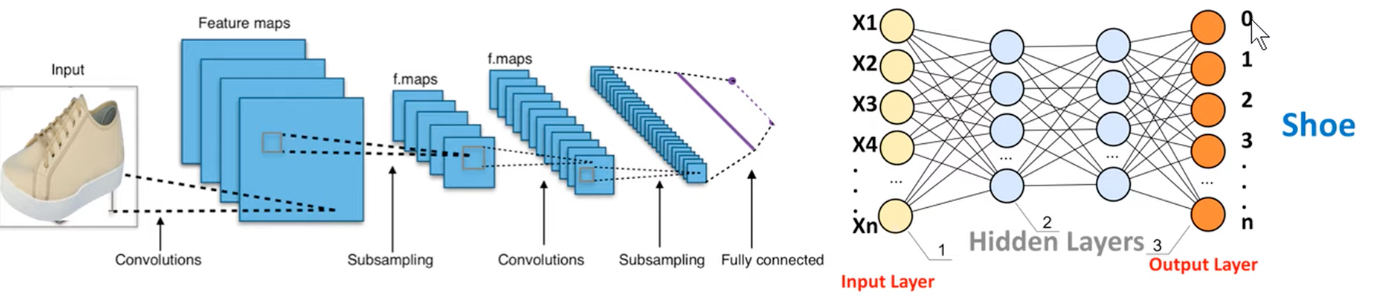

#Data Preprocessing

##import libraries

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras # to build Neural Network

##Load Data

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() 
# load dataset from  keras

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# Print shape of Data

X_train.shape, y_train.shape,

((60000, 28, 28), (60000,))

In [5]:
 X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

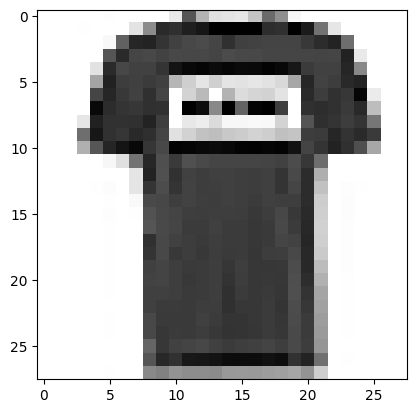

In [7]:
# show image
plt.imshow(X_train[1], cmap = 'Greys')

In [8]:
y_train[1]

0

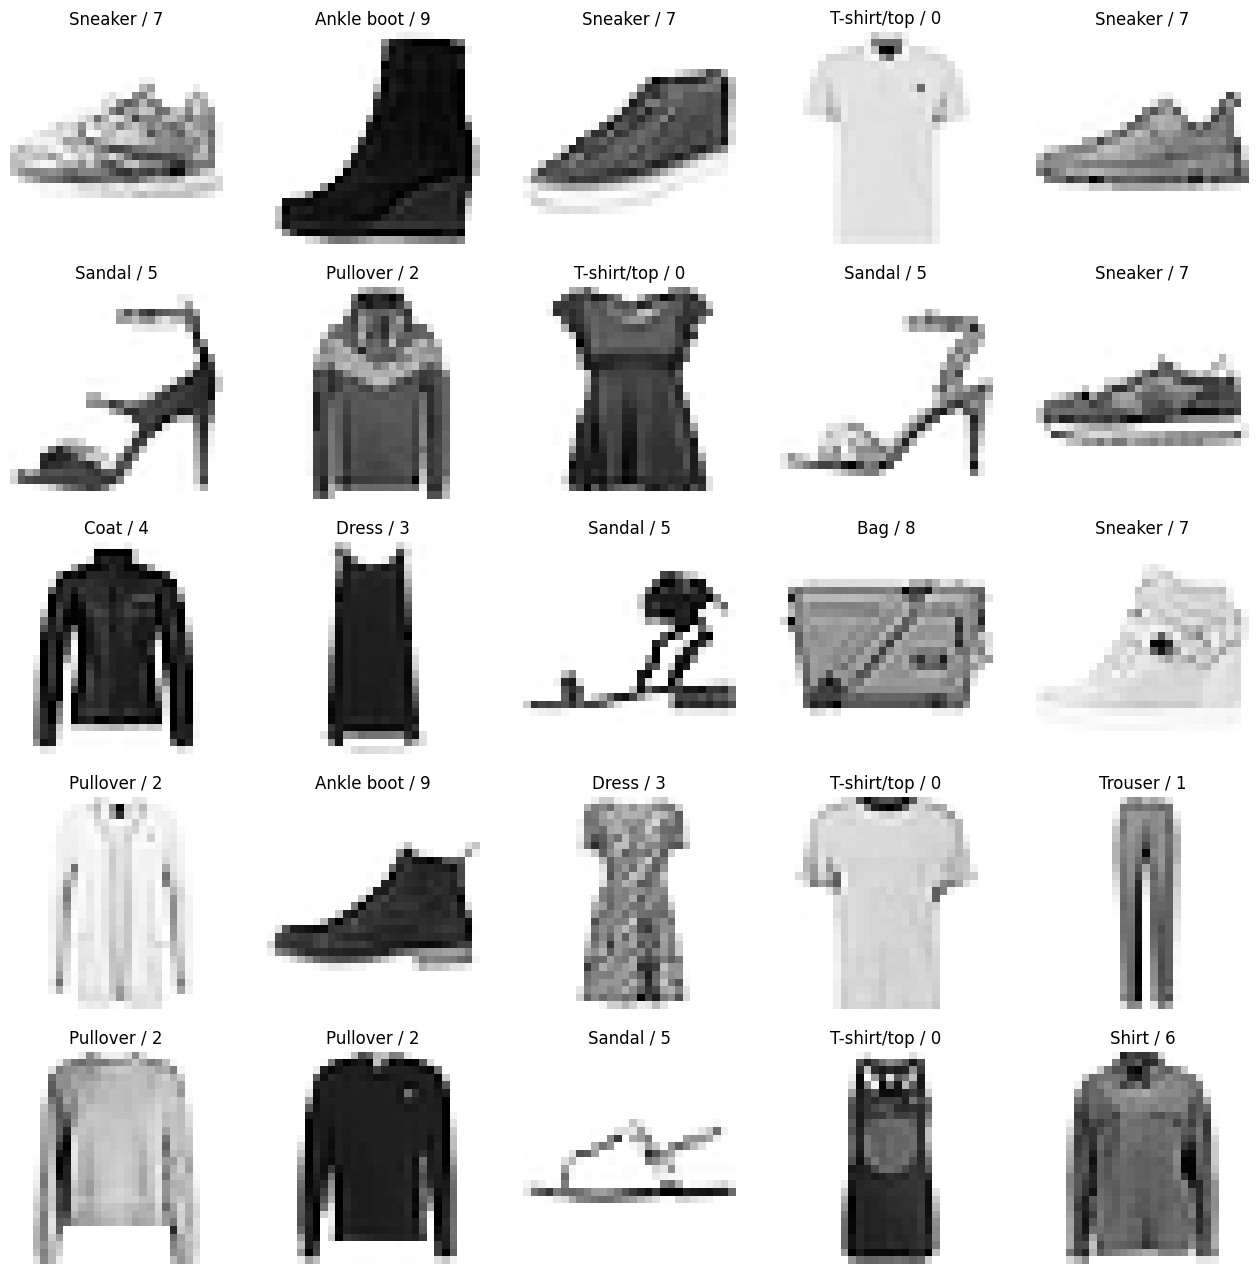

In [9]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



##change dimension

In [10]:
X_train.ndim

3

In [11]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test  , -1)

In [12]:
X_train.ndim

4

In [13]:
X_train.shape

(60000, 28, 28, 1)

##feature Scaling

In [14]:
X_train = X_train/255
X_test  = X_test /255

##split Dataset

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [16]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

#CNN: Model Building 

In [17]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [18]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [19]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation)) 
# epoch is the number of times the dataset is given to the model. 
# more epoch is more accuract but also more time to train 

#batch_size is the number of samples per  gradient update 

# verbose is how we are printing the information while the model is being trained 

Epoch 1/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2063 - accuracy: 0.9267 - val_loss: 0.2750 - val_accuracy: 0.9066
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1998 - accuracy: 0.9292 - val_loss: 0.2633 - val_accuracy: 0.9116
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.1870 - accuracy: 0.9338 - val_loss: 0.2767 - val_accuracy: 0.9038
Epoch 4/10
94/94 [==============================] - 1s 8ms/step - loss: 0.1810 - accuracy: 0.9352 - val_loss: 0.2657 - val_accuracy: 0.9094
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1755 - accuracy: 0.9372 - val_loss: 0.2587 - val_accuracy: 0.9135
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.1629 - accuracy: 0.9426 - val_loss: 0.2563 - val_accuracy: 0.9134
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.1581 - accuracy: 0.9435 - val_loss: 0.2586 - val_accuracy: 0.9135
Epoch 8/10
94/94 [==

#Test the Model

In [22]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 4ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.03, 0.03, 0.01]], dtype=float32)

In [23]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [24]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2764 - accuracy: 0.9065


[0.2763614058494568, 0.906499981880188]

#Visualize output

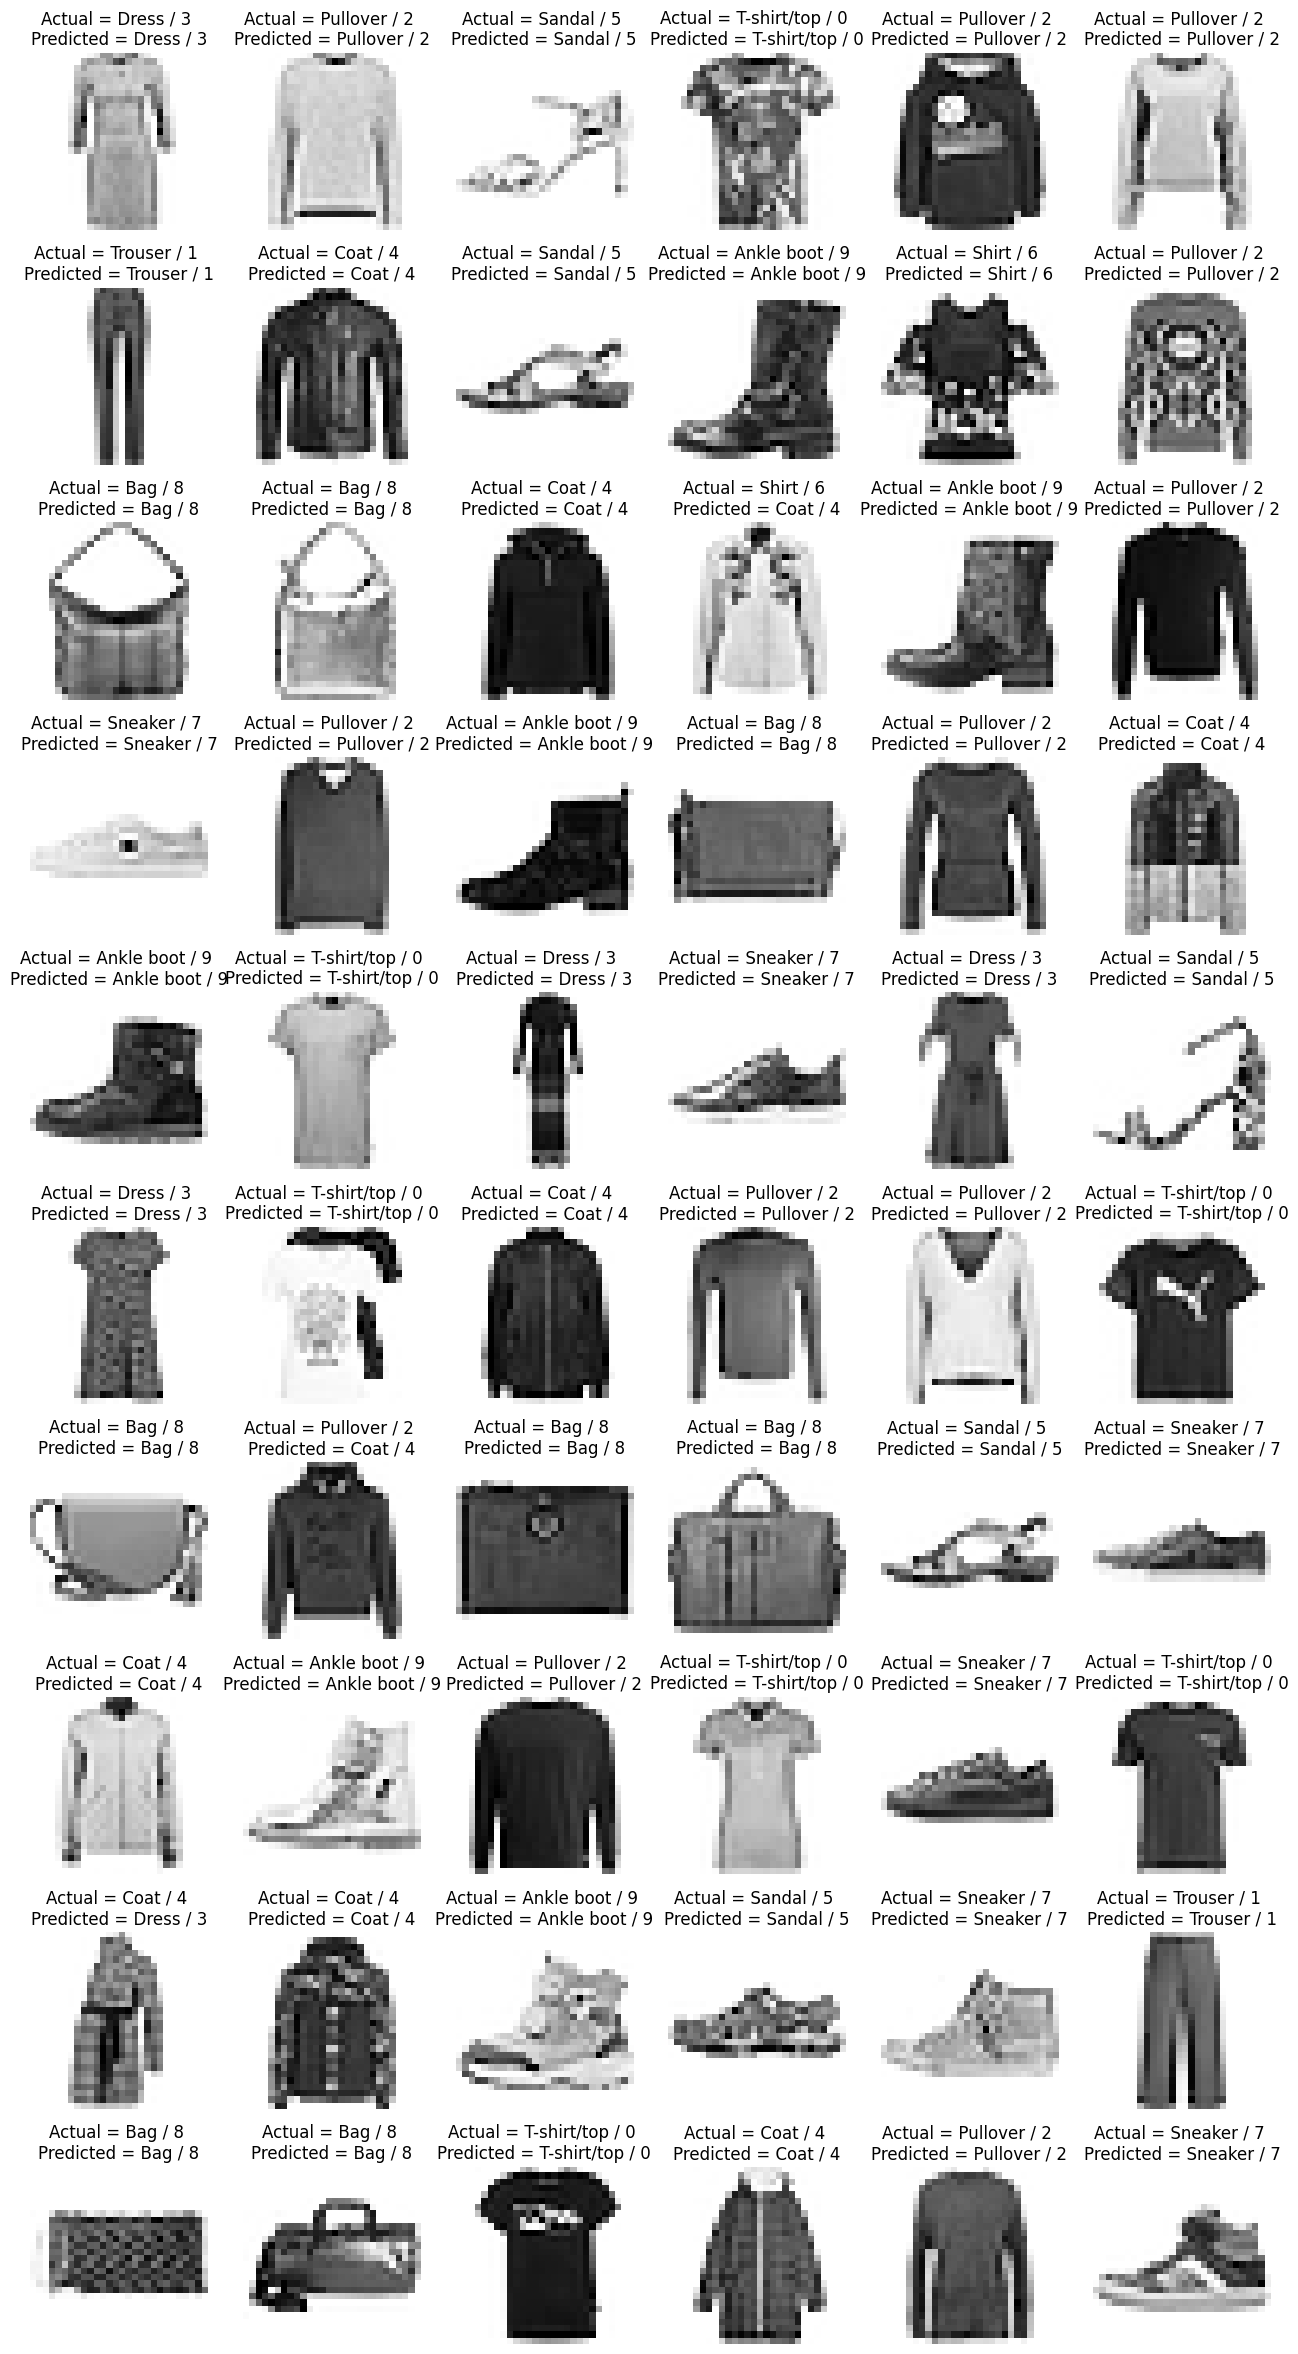

In [25]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

<Axes: >

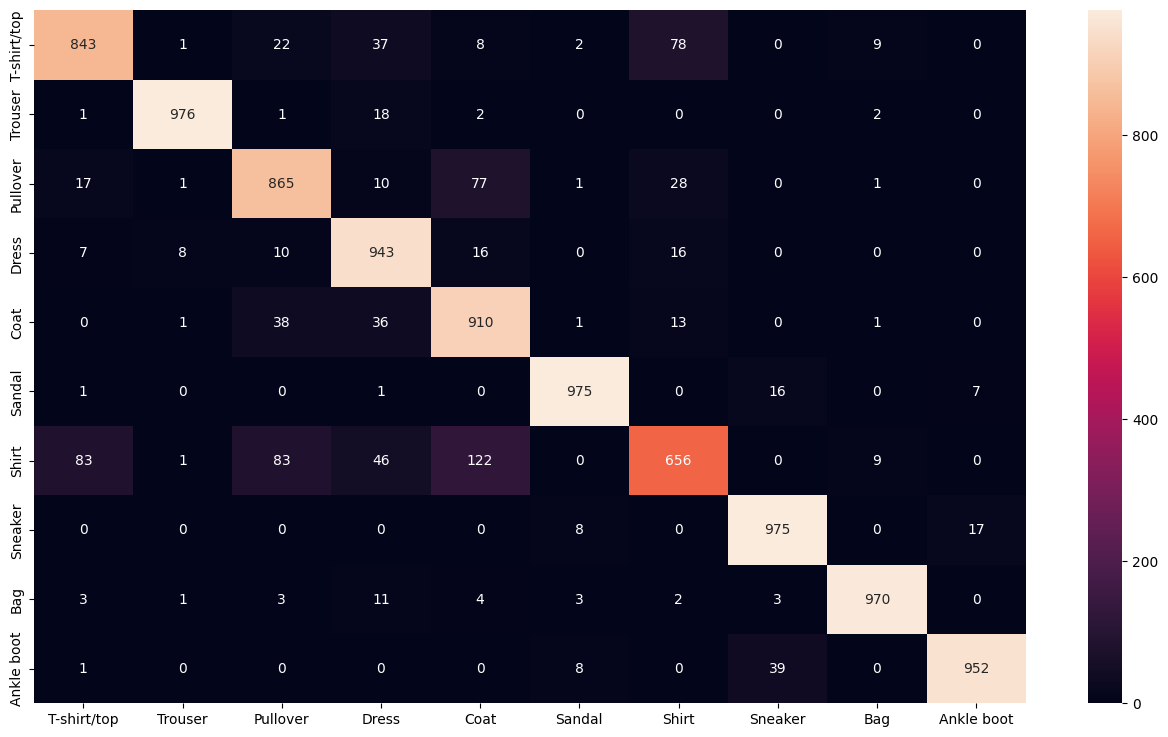

In [26]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [27]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.84      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.86      0.86      1000
       Dress       0.86      0.94      0.90      1000
        Coat       0.80      0.91      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.83      0.66      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



#Save Model

In [28]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

In [29]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [30]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 328ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
np.argmax(Y_pred_sample[0])

9

#Convolutional Neural Network - Building Complex Model

In [32]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [33]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 5s 14ms/step - loss: 1.0042 - accuracy: 0.1128 - val_loss: 0.5869 - val_accuracy: 0.1176
Epoch 2/20
94/94 [==============================] - 1s 9ms/step - loss: 0.5614 - accuracy: 0.1093 - val_loss: 0.4731 - val_accuracy: 0.1090
Epoch 3/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4624 - accuracy: 0.1102 - val_loss: 0.4116 - val_accuracy: 0.1297
Epoch 4/20
94/94 [==============================] - 1s 9ms/step - loss: 0.4059 - accuracy: 0.1076 - val_loss: 0.3591 - val_accuracy: 0.1043
Epoch 5/20
94/94 [==============================] - 1s 9ms/step - loss: 0.3669 - accuracy: 0.1043 - val_loss: 0.3420 - val_accuracy: 0.1102
Epoch 6/20
94/94 [==============================] - 1s 10ms/step - loss: 0.3443 - accuracy: 0.1040 - val_loss: 0.3421 - val_accuracy: 0.0925
Epoch 7/20
94/94 [==============================] - 1s 10ms/step - loss: 0.3250 - accuracy: 0.1035 - val_loss: 0.3247 - val_accuracy: 0.1002
Epoch 8/20
94/94 

In [36]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

#Very complex model 


In [37]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [38]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 10s 44ms/step - loss: 1.2149 - accuracy: 0.5261 - val_loss: 0.6126 - val_accuracy: 0.7593
Epoch 2/50
94/94 [==============================] - 3s 29ms/step - loss: 0.5897 - accuracy: 0.7780 - val_loss: 0.4929 - val_accuracy: 0.8157
Epoch 3/50
94/94 [==============================] - 2s 25ms/step - loss: 0.4801 - accuracy: 0.8216 - val_loss: 0.4178 - val_accuracy: 0.8457
Epoch 4/50
94/94 [==============================] - 2s 22ms/step - loss: 0.4210 - accuracy: 0.8487 - val_loss: 0.3783 - val_accuracy: 0.8634
Epoch 5/50
94/94 [==============================] - 2s 19ms/step - loss: 0.3639 - accuracy: 0.8705 - val_loss: 0.3323 - val_accuracy: 0.8792
Epoch 6/50
94/94 [==============================] - 2s 18ms/step - loss: 0.3319 - accuracy: 0.8821 - val_loss: 0.3255 - val_accuracy: 0.8833
Epoch 7/50
94/94 [==============================] - 2s 16ms/step - loss: 0.3048 - accuracy: 0.8923 - val_loss: 0.3117 - val_accuracy: 0.8906
Epoch 8/50
9

In [40]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [41]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.9060


[0.4738858938217163, 0.906000018119812]